In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


**Load train data and test data**

In [5]:
trainData = pd.read_csv('/kaggle/input/titanic/train.csv',index_col='PassengerId')
testData = pd.read_csv('/kaggle/input/titanic/test.csv')

**Take a look on columns values**

In [6]:
trainData.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**We can drop unnecessary columns which will not help us in the model to find the output like name,
ticket, cabin and embarked**

In [7]:
mtrainData = trainData.drop(['Name','Ticket','Cabin','Embarked'],axis=1)

**Take a look on data types and null values of each column and check for missing values**

In [8]:
mtrainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 55.7+ KB


**Here we have missing values in column Age only so we must handle these values by puting there median instead of nan values**
**Then re-check we have no missing values**

In [9]:
mtrainData.fillna(value = mtrainData.median(),inplace = True)
mtrainData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 55.7+ KB


**'Sex' column can't be handled with 'Female' and 'Male' string values so we must  convert them to numeric values like '0' and '1'**
**, Then check values of 'Sex' column**

In [10]:
mtrainData.Sex[mtrainData.Sex == 'female'] = 0
mtrainData.Sex[mtrainData.Sex == 'male'] = 1
mtrainData.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,7.2500
2,1,1,0,38.0,1,0,71.2833
3,1,3,0,26.0,0,0,7.9250
4,1,1,0,35.0,1,0,53.1000
5,0,3,1,35.0,0,0,8.0500


**Split data into x and y to extract survived values away**
**, Split train data into train and test data**

In [11]:
x = mtrainData.iloc[:,mtrainData.columns != 'Survived']   
y = mtrainData.iloc[:,mtrainData.columns == 'Survived'].values

from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.2,random_state=42)

**Check each column value distribution**

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


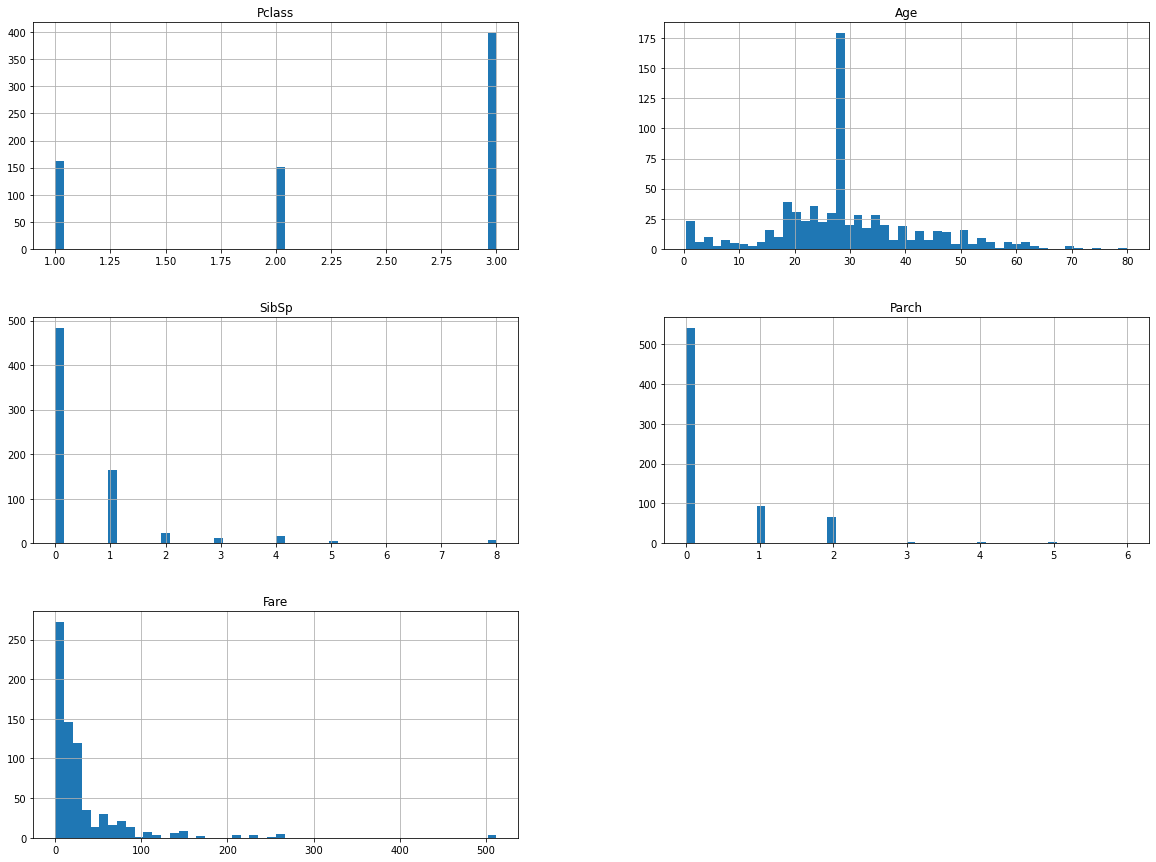

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
xTrain.hist(bins=50, figsize=(20,15))
plt.show()

**Here we saw that Age,Fare has non-normal distributions So we must scale them to be able to extract useful information from them**

In [13]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()

xTrain = scaling.fit_transform(xTrain)
xTest = scaling.transform(xTest)

**Do the same data preprocessing for test data**

In [14]:
mtestData = testData.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)
mtestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     332 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    417 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 19.7+ KB


**Here we have missing values in Age and one missing value in Fare so we must get Pclass of the missing fare first to fill this value with the median value of fare for its class, also we will fill the missing values of Age by median**



In [15]:
modifyFare = mtestData.loc[mtestData.Pclass == 3].Fare.median()
mtestData['Fare'].fillna(value = modifyFare,inplace = True)

mtestData.fillna(value = mtestData.median(),inplace = True)

**Deal with male and female values, Apply Scaling**


In [16]:
mtestData.Sex[mtestData.Sex == 'male'] = 1
mtestData.Sex[mtestData.Sex == 'female'] = 0

mtestData = scaling.transform(mtestData)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**Build model we choose Random Forest Classifier**

In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion = 'entropy',n_estimators = 10, random_state = 42)
classifier.fit(xTrain,yTrain)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

**Predict the survived passengers using the train data to get the accuracy of the model**

In [18]:
yPredict = classifier.predict(xTest)

**Model Evaluation by building Confusion Matrix and compute accuracy score**

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
confMatrix = confusion_matrix(yTest, yPredict)
accuracy = accuracy_score(yTest, yPredict)
print(confMatrix)
print('-'*40)
print(accuracy)

[[88 17]
 [21 53]]
----------------------------------------
0.7877094972067039


**Predict the survived passengers using the test data**

In [20]:
predSruvived = classifier.predict(mtestData)

**Put the outcome into a csv file which contains 2 columns the first is the passenger Id and the second indication if this passenger is sruvived or not 0 for not survived, 1 for survived**

In [21]:
outcome = pd.DataFrame({'PassengerId': testData.PassengerId, 'Survived': predSruvived})
outcome.to_csv('my_submission.csv', index=False)